In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = os.path.join('.', 'results')

In [6]:
def get_graph_info(files, column_name):
    graph_info = {}
    for file in files:
        df = pd.read_csv(file)
        relative_error = df[column_name].mean()

        option = os.path.basename(os.path.dirname(file))

        file_name = os.path.basename(file)
        elitism = float(file_name.split('_')[1][:-4])

        if option not in graph_info:
            graph_info[option] = []
        graph_info[option].append((elitism, relative_error))
        
    return graph_info

def plot_graph(graph_info, y_label):
    m_values = graph_info['M']
    q_values = graph_info['Q']

    for values in [m_values, q_values]:
        values.sort(key=lambda x: x[0])
        
        elitisms = [x[0] for x in values]
        errors = [x[1] for x in values]

        plt.plot(elitisms, errors, label='M' if values == m_values else 'Q')

    plt.xlabel('Elitism')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

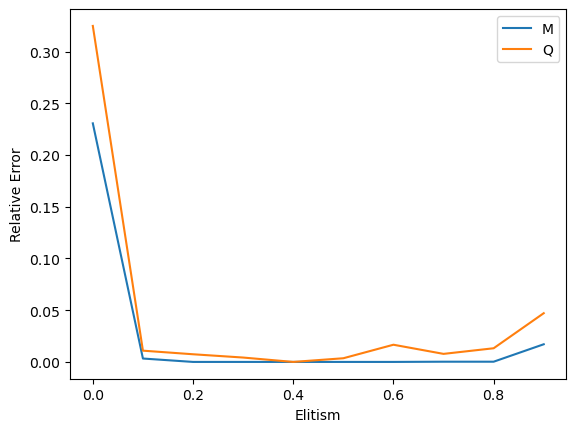

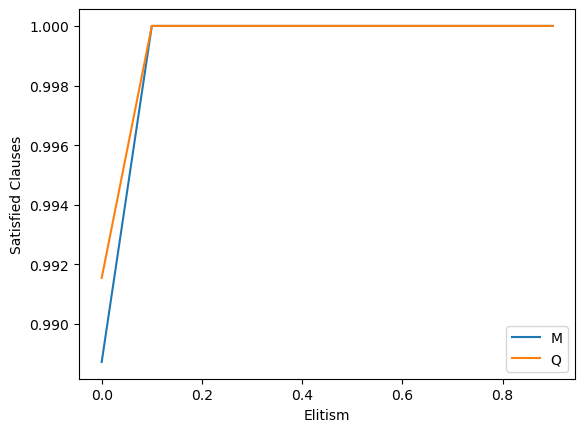

In [7]:
csv_files = glob.glob(os.path.join(DATA_DIR, '*', '*.csv'))
relative_error_graph_info = get_graph_info(csv_files, 'relative_error_avg')
satisfied_clauses_graph_info = get_graph_info(csv_files, 'satisfied_clauses')

plot_graph(relative_error_graph_info, 'Relative Error')
plot_graph(satisfied_clauses_graph_info, 'Satisfied Clauses')